In [ ]:
# Install brian2
!pip install brian2
!pip install brian2tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.7/361.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
from brian2 import *
import numpy as np

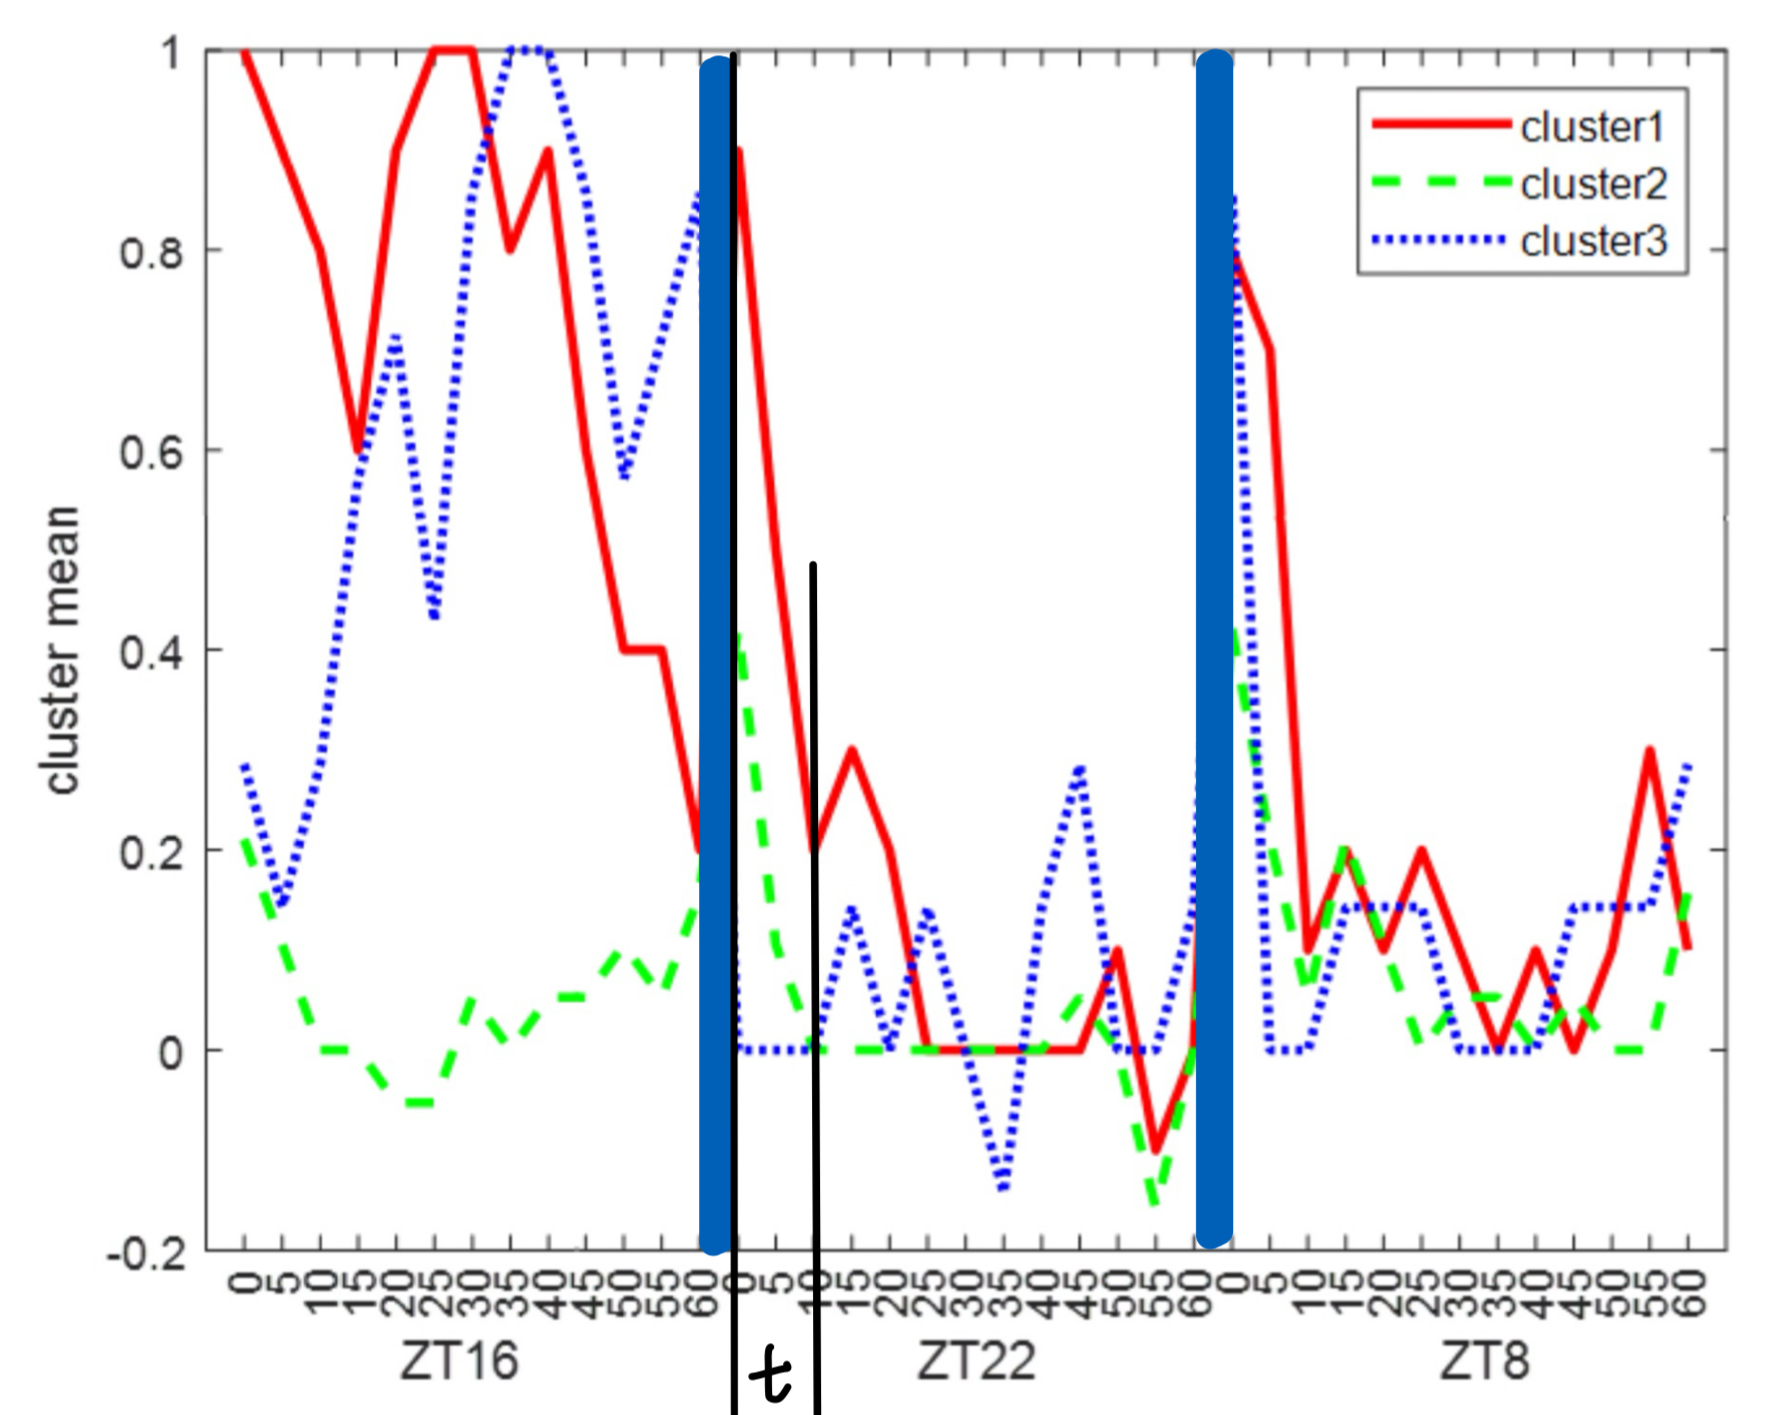

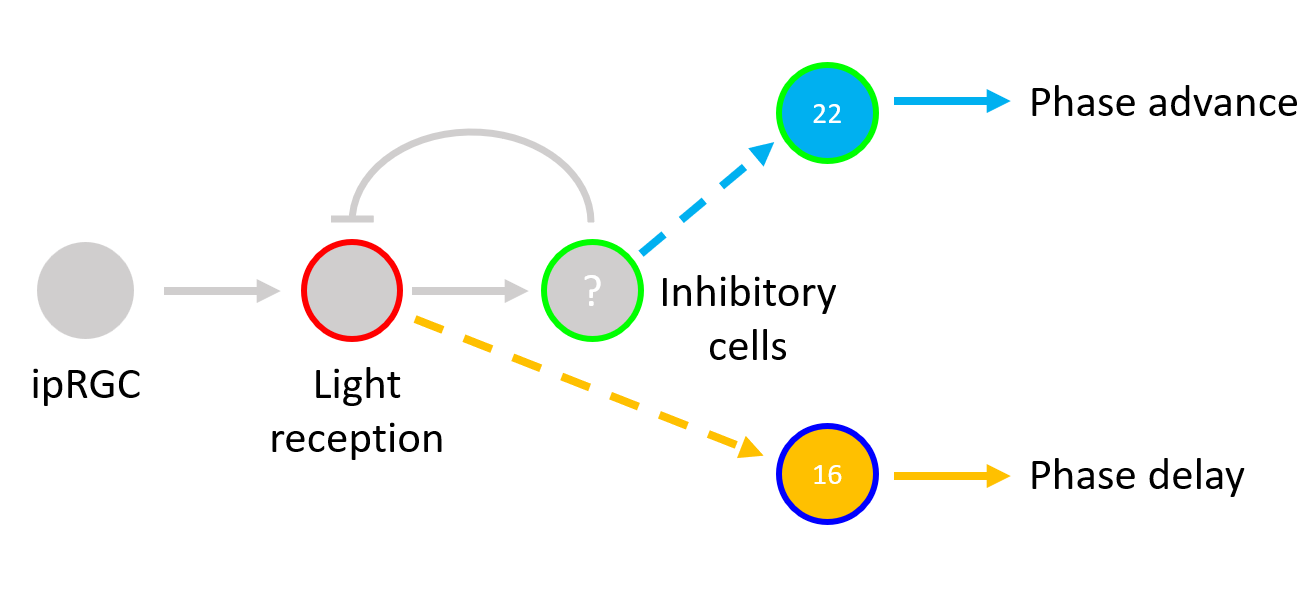

**ZT22**
*   green moderator: Iin2=0
*   blue moderator: tau_s13=1000ms, tau3=500ms  




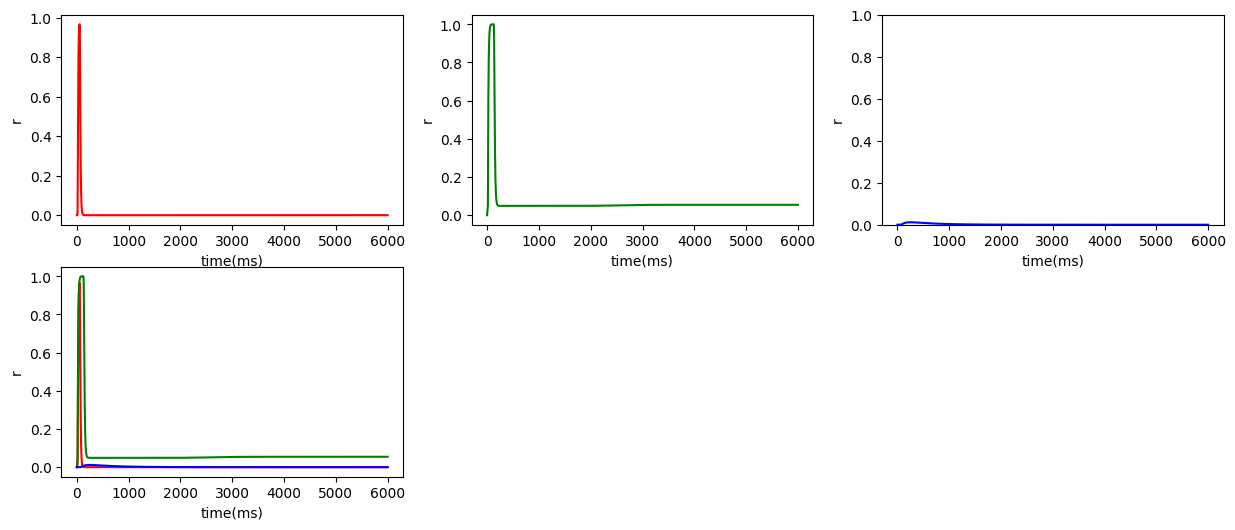

In [ ]:
start_scope()

tau1=10*ms
tau2=10*ms
tau3=500*ms     #blue neuron moderator

tau_s01=10*ms
tau_s12=10*ms
tau_s13=1000*ms   #blue neuron moderator
tau_s21=1000*ms

input = 1

threshold_all=0.5
threshold_3=0.5
threshold_1=0.45
threshold_2=0.09  #調低 theta2 來 damp green neuron oscillation


w01=1
w12=22      #先調高 w12 來壓 red neuron equilibrium state
w13=10
w21=-15



eqs='''
dr/dt = ( - r + 1/(1 + exp(-a*(Isyn + Iin - theta))))/ tau : 1
Iin : 1
Isyn : 1
theta : 1
a : 1
tau : second
'''

G=NeuronGroup(4, eqs, method='exact')

G.r = 0.0
G.Iin = 0.0
G.theta=threshold_all
G.a=33


G[0].Iin=input
G[3].theta=threshold_3
G[1].theta=threshold_1
G[2].theta=threshold_2


G.tau=10*ms
G[1].tau=tau1
G[2].tau=tau2
G[3].tau=tau3



S = Synapses(G, G, model='''ds/dt = (-s + w*r_pre)/taus : 1
Isyn_post = s : 1 (summed)
taus : second
w : 1
''', method='exact')

S.connect(i=[0,1,1,2], j=[1,2,3,1])


S.w[0]=w01
S.w[1]=w12
S.w[2]=w13
S.w[3]=w21

S.taus[0]=tau_s01
S.taus[1]=tau_s12
S.taus[2]=tau_s13
S.taus[3]=tau_s21



M = StateMonitor(G, 'r', record=[1,2,3])


run(6000*ms)


figure(figsize=(15,6))

subplot(231)
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
xlabel("time(ms)")
ylabel("r")
subplot(232)
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
xlabel("time(ms)")
ylabel("r")
subplot(233)
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")
ylim(0,1)
xlabel("time(ms)")
ylabel("r")

subplot(234)
xlabel("time(ms)")
ylabel("r")
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")

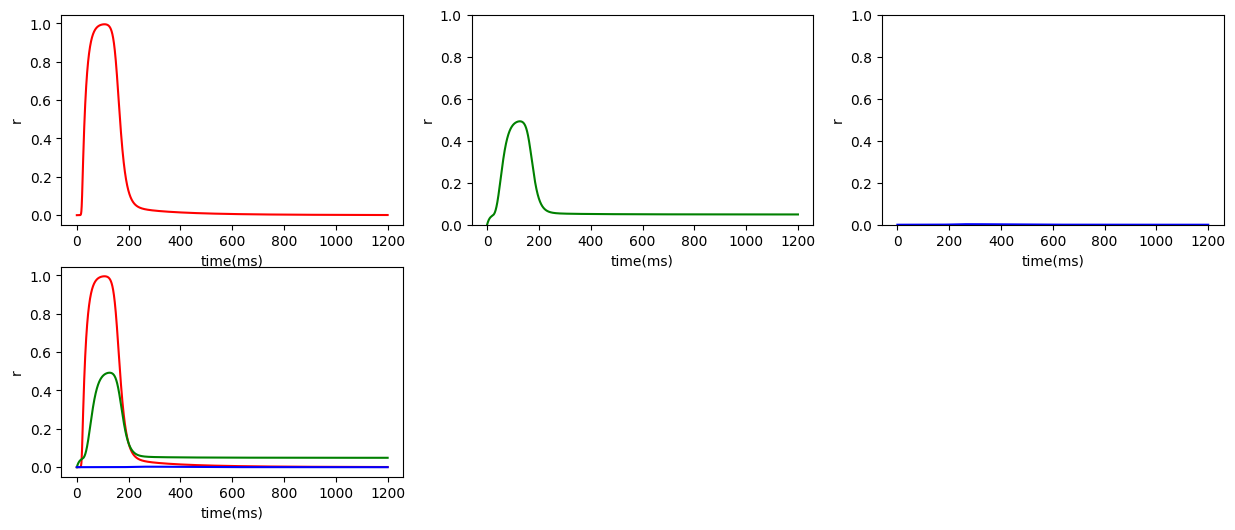

In [ ]:
#ZT22
start_scope()

tau1=15*ms
tau2=10*ms
tau3=100*ms     #blue neuron moderator

tau_s01=10*ms
tau_s12=10*ms
tau_s13=1500*ms   #blue neuron moderator
tau_s21=2000*ms

input = 1

threshold_all=0.5
threshold_3=1
threshold_1=0.45
threshold_2=0.09 #調低 theta2 來 damp green neuron oscillation


w01=0.8
w12=0.09      #先調高 w12 來壓 red neuron equilibrium state #竟然要用這個才能紅高綠低(22->0.09)
w13=10
w21=-15



eqs='''
dr/dt = ( - r + 1/(1 + exp(-a*(Isyn + Iin - theta))))/ tau : 1
Iin : 1
Isyn : 1
theta : 1
a : 1
tau : second
'''

G=NeuronGroup(4, eqs, method='exact')

G.r = 0.0
G.Iin = 0.0
G.theta=threshold_all
G.a=33


G[0].Iin=input
G[3].theta=threshold_3
G[1].theta=threshold_1
G[2].theta=threshold_2


G.tau=10*ms
G[1].tau=tau1
G[2].tau=tau2
G[3].tau=tau3



S = Synapses(G, G, model='''ds/dt = (-s + w*r_pre)/taus : 1
Isyn_post = s : 1 (summed)
taus : second
w : 1
''', method='exact')

S.connect(i=[0,1,1,2], j=[1,2,3,1])


S.w[0]=w01
S.w[1]=w12
S.w[2]=w13
S.w[3]=w21

S.taus[0]=tau_s01
S.taus[1]=tau_s12
S.taus[2]=tau_s13
S.taus[3]=tau_s21



M = StateMonitor(G, 'r', record=[1,2,3])


run(1200*ms)



figure(figsize=(15,6))

subplot(231)
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
xlabel("time(ms)")
ylabel("r")
subplot(232)
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
ylim(0,1)
xlabel("time(ms)")
ylabel("r")
subplot(233)
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")
ylim(0,1)
xlabel("time(ms)")
ylabel("r")

subplot(234)
xlabel("time(ms)")
ylabel("r")
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")

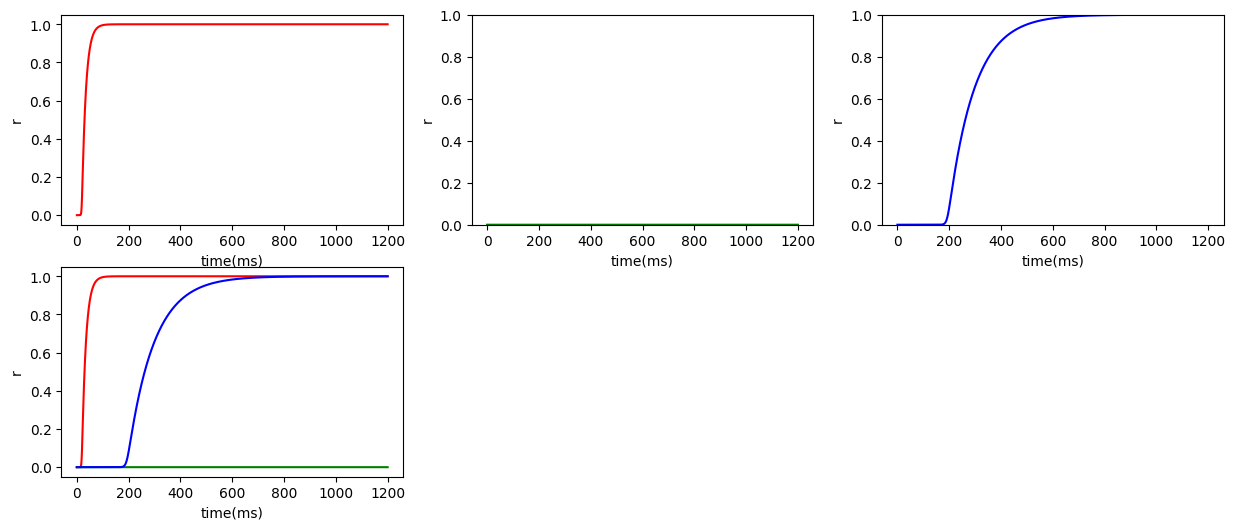

In [ ]:
#ZT16
#Iin2=-0.5
start_scope()

tau1=15*ms
tau2=10*ms
tau3=100*ms     #blue neuron moderator

tau_s01=10*ms
tau_s12=10*ms
tau_s13=1500*ms   #blue neuron moderator
tau_s21=2000*ms

input = 1
I_in2=-0.5         #I_in2大小其實取決於noise

threshold_all=0.5
threshold_3=1
threshold_1=0.45
threshold_2=0.09 #調低 theta2 來 damp green neuron oscillation


w01=0.8
w12=0.09      #先調高 w12 來壓 red neuron equilibrium state #竟然要用這個才能紅高綠低(22->0.09)
w13=10
w21=-15



eqs='''
dr/dt = ( - r + 1/(1 + exp(-a*(Isyn + Iin - theta))))/ tau : 1
Iin : 1
Isyn : 1
theta : 1
a : 1
tau : second
'''

G=NeuronGroup(4, eqs, method='exact')

G.r = 0.0
G.Iin = 0.0
G[2].Iin=I_in2

G.theta=threshold_all
G.a=33


G[0].Iin=input
G[3].theta=threshold_3
G[1].theta=threshold_1
G[2].theta=threshold_2


G.tau=10*ms
G[1].tau=tau1
G[2].tau=tau2
G[3].tau=tau3



S = Synapses(G, G, model='''ds/dt = (-s + w*r_pre)/taus : 1
Isyn_post = s : 1 (summed)
taus : second
w : 1
''', method='exact')

S.connect(i=[0,1,1,2], j=[1,2,3,1])


S.w[0]=w01
S.w[1]=w12
S.w[2]=w13
S.w[3]=w21

S.taus[0]=tau_s01
S.taus[1]=tau_s12
S.taus[2]=tau_s13
S.taus[3]=tau_s21



M = StateMonitor(G, 'r', record=[1,2,3])


run(1200*ms)



figure(figsize=(15,6))

subplot(231)
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
xlabel("time(ms)")
ylabel("r")
subplot(232)
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
ylim(0,1)
xlabel("time(ms)")
ylabel("r")
subplot(233)
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")
ylim(0,1)
xlabel("time(ms)")
ylabel("r")

subplot(234)
xlabel("time(ms)")
ylabel("r")
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")

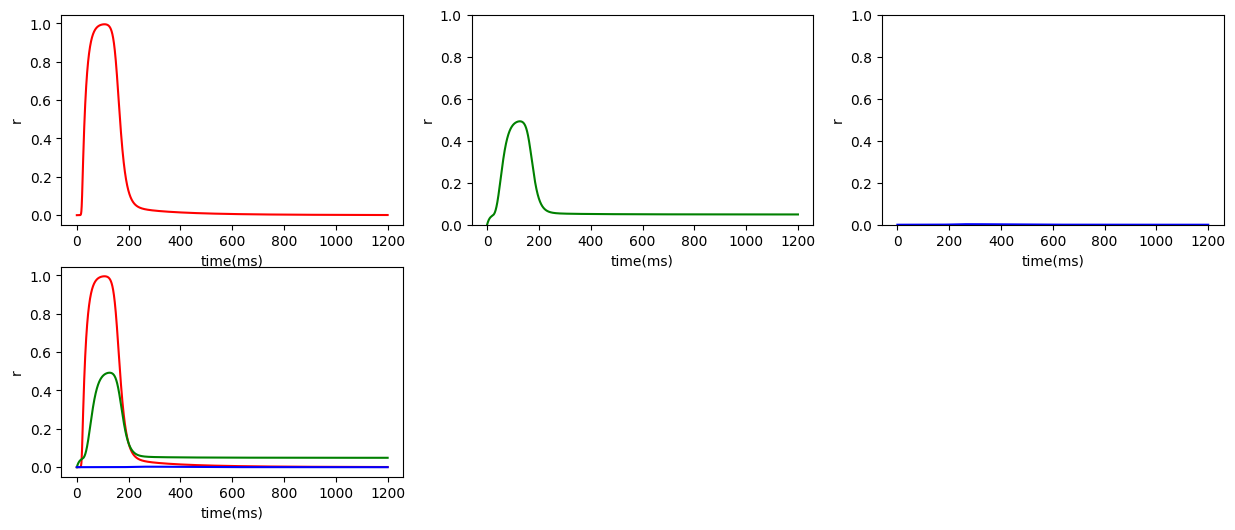

In [ ]:
#ZT8
start_scope()

tau1=15*ms
tau2=10*ms
tau3=100*ms     #blue neuron moderator

tau_s01=10*ms
tau_s12=10*ms
tau_s13=1500*ms   #blue neuron moderator
tau_s21=2000*ms

input = 1
I_in3=0

threshold_all=0.5
threshold_3=1
threshold_1=0.45
threshold_2=0.09 #調低 theta2 來 damp green neuron oscillation


w01=0.8
w12=0.09      #先調高 w12 來壓 red neuron equilibrium state #竟然要用這個才能紅高綠低(22->0.09)
w13=10
w21=-15



eqs='''
dr/dt = ( - r + 1/(1 + exp(-a*(Isyn + Iin - theta))))/ tau : 1
Iin : 1
Isyn : 1
theta : 1
a : 1
tau : second
'''

G=NeuronGroup(4, eqs, method='exact')

G.r = 0.0
G.Iin = 0.0
G[3].Iin=I_in3

G.theta=threshold_all
G.a=33


G[0].Iin=input
G[3].theta=threshold_3
G[1].theta=threshold_1
G[2].theta=threshold_2


G.tau=10*ms
G[1].tau=tau1
G[2].tau=tau2
G[3].tau=tau3



S = Synapses(G, G, model='''ds/dt = (-s + w*r_pre)/taus : 1
Isyn_post = s : 1 (summed)
taus : second
w : 1
''', method='exact')

S.connect(i=[0,1,1,2], j=[1,2,3,1])


S.w[0]=w01
S.w[1]=w12
S.w[2]=w13
S.w[3]=w21

S.taus[0]=tau_s01
S.taus[1]=tau_s12
S.taus[2]=tau_s13
S.taus[3]=tau_s21



M = StateMonitor(G, 'r', record=[1,2,3])


run(1200*ms)



figure(figsize=(15,6))

subplot(231)
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
xlabel("time(ms)")
ylabel("r")
subplot(232)
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
ylim(0,1)
xlabel("time(ms)")
ylabel("r")
subplot(233)
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")
ylim(0,1)
xlabel("time(ms)")
ylabel("r")

subplot(234)
xlabel("time(ms)")
ylabel("r")
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")

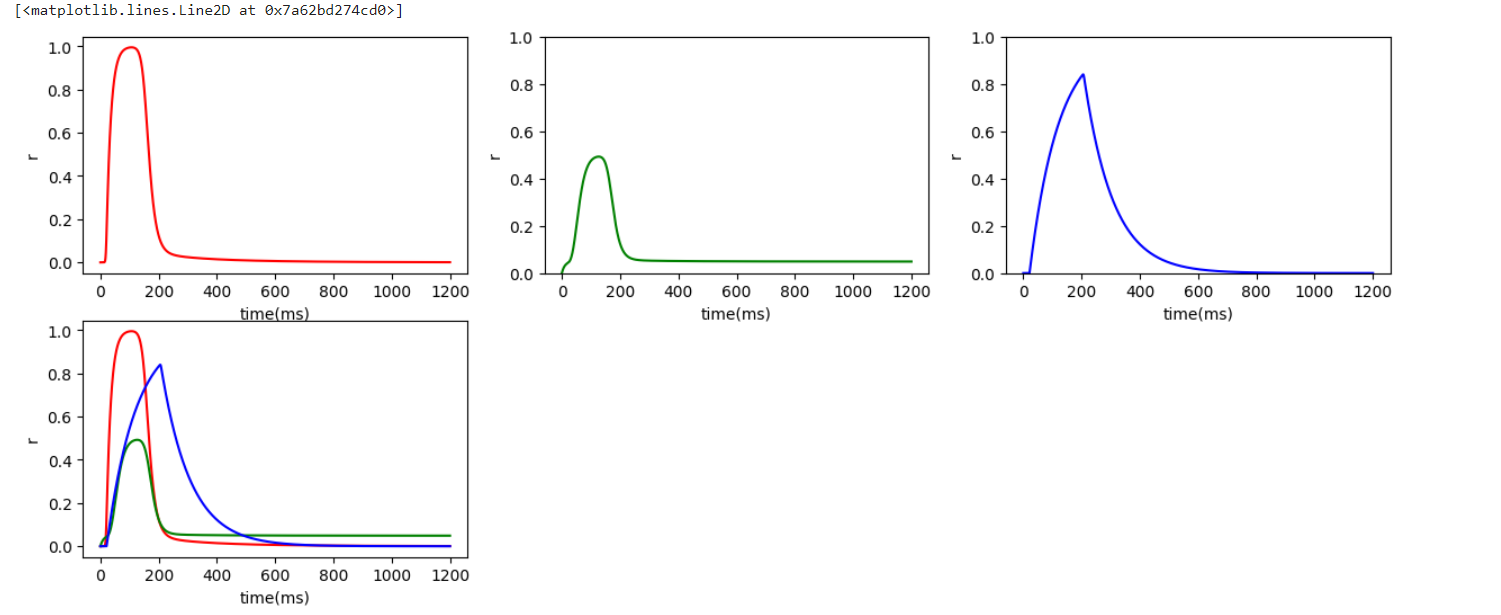

**ZT16**

*   green moderator: Iin2=-45
*   blue moderator: tau_s13=1000ms, tau3=500ms  

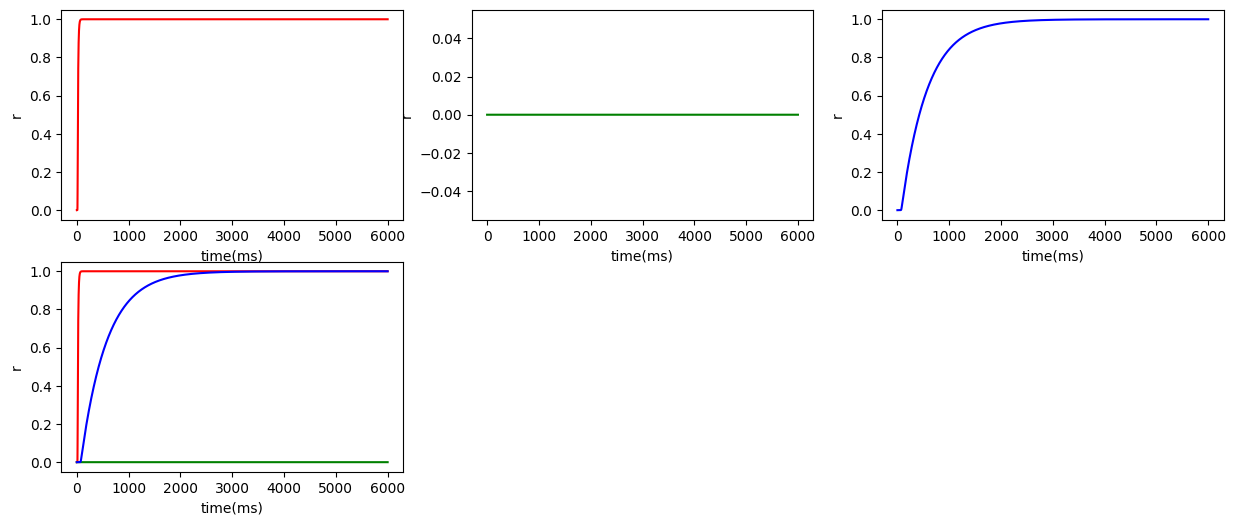

In [ ]:
start_scope()

tau1=10*ms
tau2=10*ms
tau3=500*ms     #blue neuron moderator

tau_s01=10*ms
tau_s12=10*ms
tau_s13=1000*ms   #blue neuron moderator
tau_s21=1000*ms

input = 1
Iin2=-45


threshold_all=0.5
threshold_3=0.5
threshold_1=0.4
threshold_2=0.09  #green neuron moderator


w01=1
w12=22      #先調高 w12 來壓 red neuron equilibrium state
w13=10
w21=-15



eqs='''
dr/dt = ( - r + 1/(1 + exp(-a*(Isyn + Iin - theta))))/ tau : 1
Iin : 1
Isyn : 1
theta : 1
a : 1
tau : second
'''

G=NeuronGroup(4, eqs, method='exact')

G.r = 0.0
G.Iin = 0.0
G.theta=threshold_all
G.a=33


G[0].Iin=input
G[2].Iin=Iin2

G[3].theta=threshold_3
G[1].theta=threshold_1
G[2].theta=threshold_2


G.tau=10*ms
G[1].tau=tau1
G[2].tau=tau2
G[3].tau=tau3



S = Synapses(G, G, model='''ds/dt = (-s + w*r_pre)/taus : 1
Isyn_post = s : 1 (summed)
taus : second
w : 1
''', method='exact')

S.connect(i=[0,1,1,2], j=[1,2,3,1])


S.w[0]=w01
S.w[1]=w12
S.w[2]=w13
S.w[3]=w21

S.taus[0]=tau_s01
S.taus[1]=tau_s12
S.taus[2]=tau_s13
S.taus[3]=tau_s21



M = StateMonitor(G, 'r', record=[1,2,3])


run(6000*ms)


figure(figsize=(15,6))

subplot(231)
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
xlabel("time(ms)")
ylabel("r")
subplot(232)
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
xlabel("time(ms)")
ylabel("r")
subplot(233)
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")
xlabel("time(ms)")
ylabel("r")

subplot(234)
xlabel("time(ms)")
ylabel("r")
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")

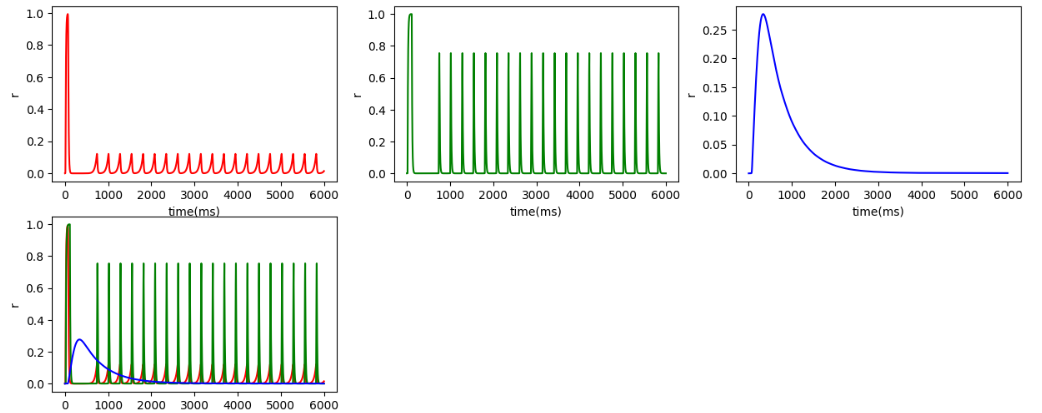

**ZT8**
*   green moderator: Iin2=0
*   blue moderator: tau_s13=10ms, tau3=10ms  

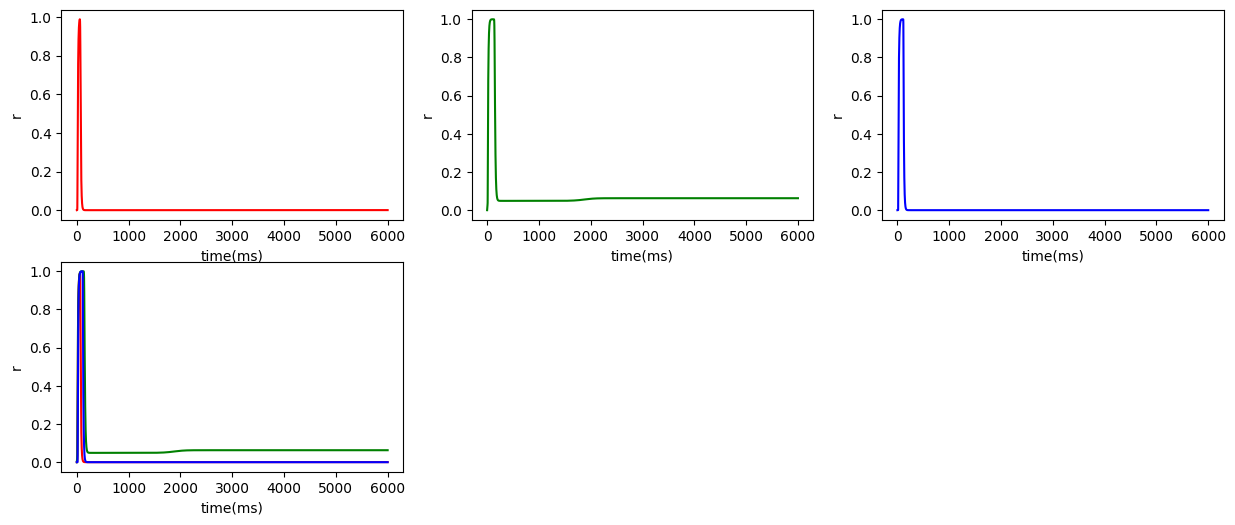

In [ ]:
start_scope()

tau1=10*ms
tau2=10*ms
tau3=10*ms

tau_s01=10*ms
tau_s12=10*ms
tau_s13=10*ms
tau_s21=1000*ms

input = 1

threshold_all=0.5
threshold_3=0.5   #blue neuron moderator
threshold_1=0.3
threshold_2=0.09  #green neuron moderator


w01=1
w12=22      #先調高 w12 來壓 red neuron equilibrium state
w13=10
w21=-15



eqs='''
dr/dt = ( - r + 1/(1 + exp(-a*(Isyn + Iin - theta))))/ tau : 1
Iin : 1
Isyn : 1
theta : 1
a : 1
tau : second
'''

G=NeuronGroup(4, eqs, method='exact')

G.r = 0.0
G.Iin = 0.0
G.theta=threshold_all
G.a=33


G[0].Iin=input
G[3].theta=threshold_3
G[1].theta=threshold_1
G[2].theta=threshold_2


G.tau=10*ms
G[1].tau=tau1
G[2].tau=tau2
G[3].tau=tau3



S = Synapses(G, G, model='''ds/dt = (-s + w*r_pre)/taus : 1
Isyn_post = s : 1 (summed)
taus : second
w : 1
''', method='exact')

S.connect(i=[0,1,1,2], j=[1,2,3,1])


S.w[0]=w01
S.w[1]=w12
S.w[2]=w13
S.w[3]=w21

S.taus[0]=tau_s01
S.taus[1]=tau_s12
S.taus[2]=tau_s13
S.taus[3]=tau_s21



M = StateMonitor(G, 'r', record=[1,2,3])


run(6000*ms)


figure(figsize=(15,6))

subplot(231)
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
xlabel("time(ms)")
ylabel("r")
subplot(232)
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
xlabel("time(ms)")
ylabel("r")
subplot(233)
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")
xlabel("time(ms)")
ylabel("r")

subplot(234)
xlabel("time(ms)")
ylabel("r")
plot(M.t/ms, M[1].r, color="red", label="Neuron 1")
plot(M.t/ms, M[2].r, color="green", label="Neuron 2")
plot(M.t/ms, M[3].r, color="blue", label="Neuron 3")

**taus_01=50** \
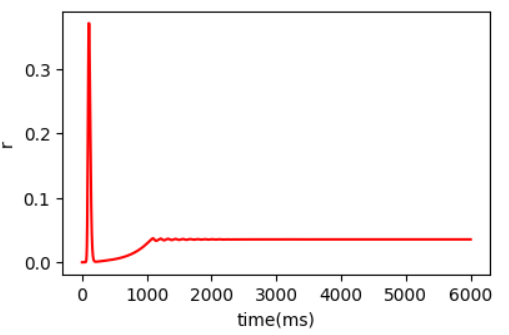
\
**taus_01=10**
\
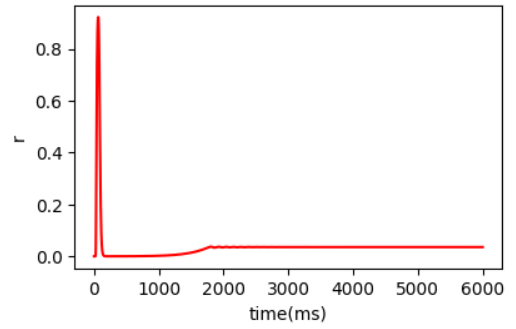
